In this file we will handle the spiking of the PC neuron, here we analyse and generate data for different regimes with the same mutual information. These inputs will then be compared to the different outputs of the data.

In [12]:
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

In [13]:
from brian2 import *
from matplotlib import pyplot as plt
import Documentation.parameters as p
from Foundations.helpers import scale_input_theory, make_spiketrain
from Foundations.MI import analyze_exp
import pandas as pd

In [14]:
from Old_testing.make_dynamic_experiment_ori import make_dynamic_experiments
from Old_testing.currentmodel import Barrel_PC, Barrel_IN

In [15]:
defaultclock = p.dt*ms
np.random.seed()
seed = np.random.randint(1000000000)

In [22]:
def return_spiketrain(regime):
    [input_theory, hidden_state] = make_dynamic_experiments(p.qon_qoff_type, p.baseline, p.tau, p.factor_ron_roff, p.mean_firing_rate, p.sampling_rate, p.duration)

    inj_current = scale_input_theory(input_theory, 0, 21, p.dt)

    start_scope()
    PC = Barrel_PC(p.dt, inj_current)

    PC_neuron = PC.getNeurongroup()

    PC_M = StateMonitor(PC_neuron, 'v', record=True)
    PC_S = SpikeMonitor(PC_neuron, 'v', record = True)

    run(p.duration*ms)

    return input_theory, inj_current, hidden_state, PC_M, PC_S

In [23]:
input_theory, inj_current, hidden_state, PC_M, PC_S = return_spiketrain(1)

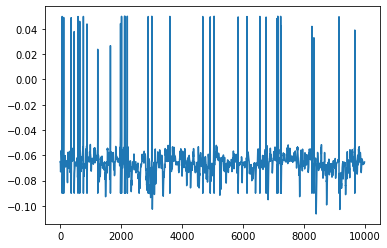

In [24]:
plot(PC_M.t / ms, PC_M.v[0], label='PC_pre')

In [25]:
spiketrain = make_spiketrain(PC_S)


In [26]:
output = analyze_exp(hidden_state, input_theory,0, spiketrain,p.duration/p.sampling_rate, 'test')
output.replace(r'\\n', ' ', regex= True)
output.columns

[[0. 0. 0. ... 0. 0. 0.]]


Index(['weigts', 'Hxx', 'Hxy', 'MI_i', 'xhat_i', 'MSE_i', 'Hxx_2', 'Hxy_2',
       'MI', 'qon', 'qoff', 'xhatspikes', 'MSE', 'F', 'F_I'],
      dtype='object')

In [27]:
output

,weigts,Hxx,Hxy,MI_i,xhat_i,MSE_i,Hxx_2,Hxy_2,MI,qon,qoff,xhatspikes,MSE,F,F_I
0,test,0.999237,0.61235,0.386887,"[0.3333333333333333, 0.3333333333333333, 0.333...",3.376371,0.999237,4.979591,-3.980354,0.005168,0.000969,"[0.3333333333333333, 0.26346284089615996, 0.20...",12.073049,0.387182,-10.28817


In [28]:
print(np.sum(spiketrain))

33


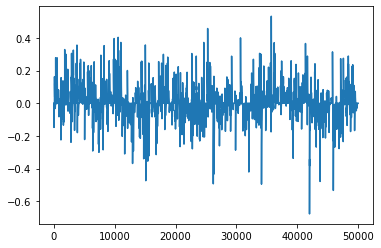

In [30]:
plt.plot(input_theory)

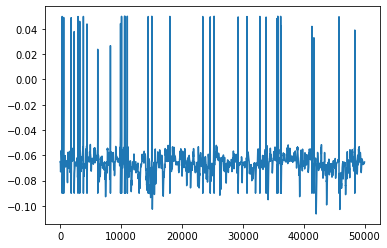

In [33]:
plt.plot(PC_M.v[0])

In [36]:
spiketrain

array([[0, 0, 0, ..., 0, 0, 0]])

In [37]:
output = analyze_exp(hidden_state, input_theory,0, spiketrain,p.duration/p.sampling_rate, 'test')
output.replace(r'\\n', ' ', regex= True)

[[0. 0. 0. ... 0. 0. 0.]]


,weigts,Hxx,Hxy,MI_i,xhat_i,MSE_i,Hxx_2,Hxy_2,MI,qon,qoff,xhatspikes,MSE,F,F_I
0,test,0.999237,0.61235,0.386887,"[0.3333333333333333, 0.3333333333333333, 0.333...",3.376371,0.999237,4.979591,-3.980354,0.005168,0.000969,"[0.3333333333333333, 0.26346284089615996, 0.20...",12.073049,0.387182,-10.28817


In [35]:
output

,weigts,Hxx,Hxy,MI_i,xhat_i,MSE_i,Hxx_2,Hxy_2,MI,qon,qoff,xhatspikes,MSE,F,F_I
0,test,0.999237,0.61235,0.386887,"[0.3333333333333333, 0.3333333333333333, 0.333...",3.376371,0.999237,4.979591,-3.980354,0.005168,0.000969,"[0.3333333333333333, 0.26346284089615996, 0.20...",12.073049,0.387182,-10.28817


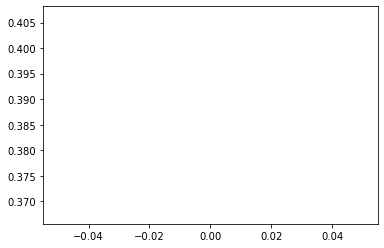

In [39]:
plt.plot(output['MI_i'])